Assignment: Deep Learning with RNNs (Sequence Models)
YanXuan
NUID 001563047

In [1]:
# The Transformer model is a model based on the Attention mechanism to accelerate deep learning algorithms. 
# It can perform parallel calculations, and each word notices the influence of other words during processing.
from transformers import pipeline

D:\anaconda3\envs\snake\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


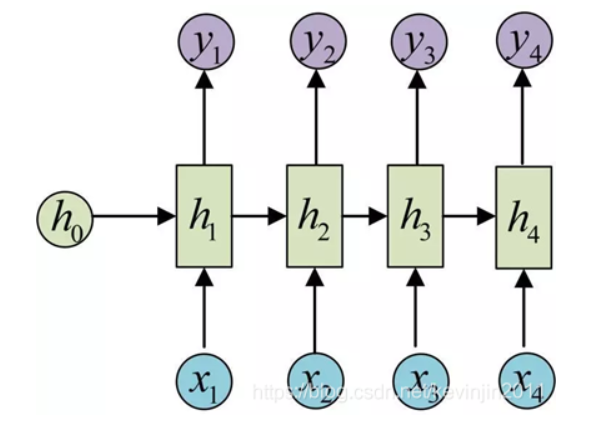

1. Fill-Mask (10 Points)
Run a <Fill-Mask> language model. Explain the theory behind your model, and run it. Analyze how well you think it worked.

The model is based on Bidirectional Encoder Representations from Transformers (BERT). It enables/forces bidirectional learning from text by masking words in sentences and forcing BERT to bidirectionally use words on both sides of the masked word to predict the masked word. BERT doesn’t use a decoder.
    
The task of Masked Language Modeling is to provide a sequence containing a special tag [MASK], and then let the model predict the original words in the mask position. For example, provide "I [MASK] you", predict the words of [MASK] position, such as "love", "like" or "hate". This task will allow the model to pay attention to the context information around [MASK] at the same time. This training will create a solid foundation for downstream tasks, such as question answering tasks that need to recognize bidirectional context (such as the SQuAD dataset). After 15% of the tokens are selected, not all of them are replaced with the [mask] tag, but from the 15% selected part, 80% of them are replaced with [mask], and 10% are replaced with a Random token, the remaining 10% retain the original token. Doing so improves the robustness of the model. This ratio can also be controlled by yourself. Transformers are uniquely suited for unsupervised learning because they can efficiently process millions of data points.
    

References:
[1] https://huggingface.co/blog/bert-101
[2] https://huggingface.co/tasks/fill-mask

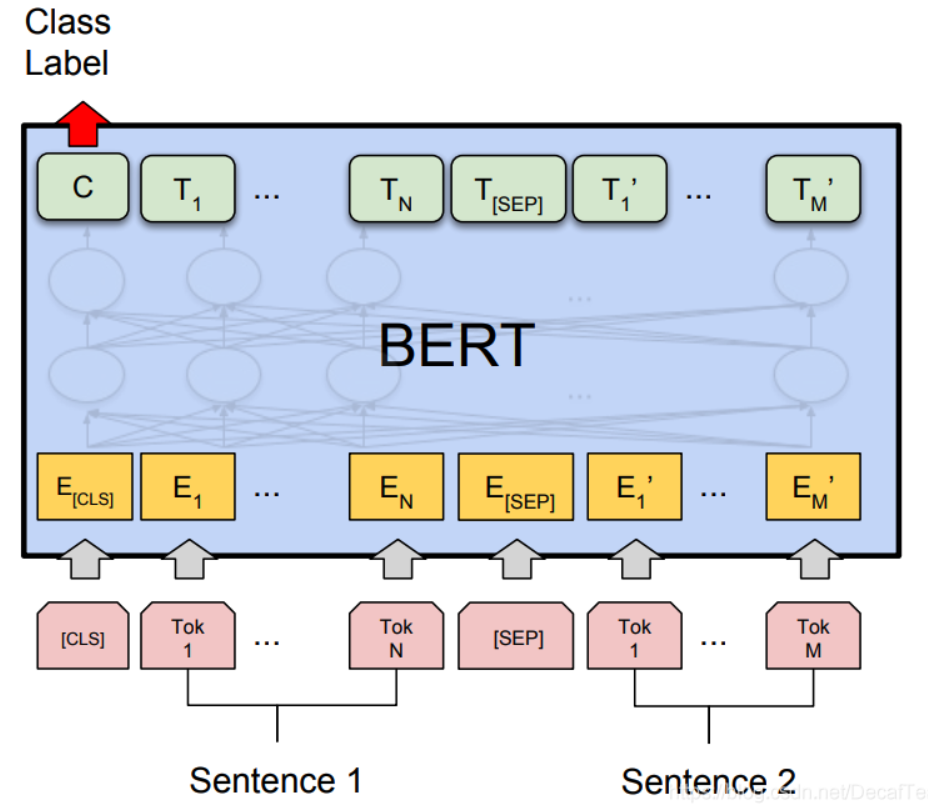

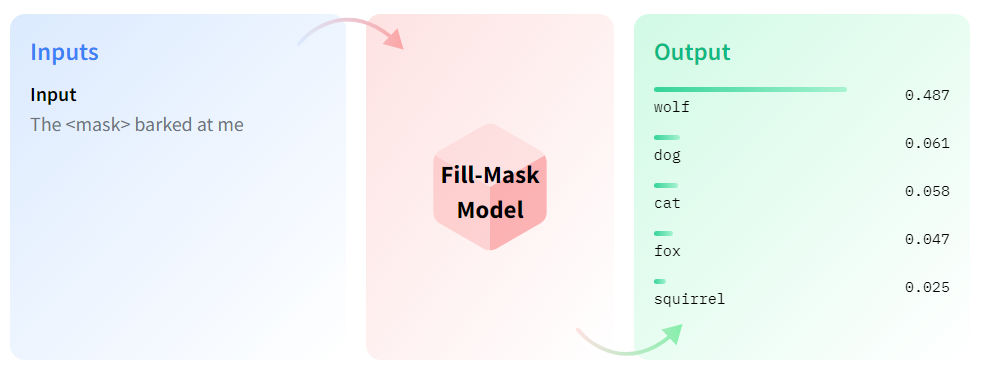

In [3]:
classifier_fm = pipeline("fill-mask")
classifier_fm("Taiwan is one of <mask> of China.")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|██████████████████████████████████████████████████████████████████| 331M/331M [00:12<00:00, 27.4MB/s]
D:\anaconda3\envs\pytorch\lib\site-packages\huggingface_hub\file_download.py:125: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dellpc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an ad

[{'score': 0.17146886885166168,
  'token': 3497,
  'token_str': ' Republic',
  'sequence': 'Taiwan is one of Republic of China.'},
 {'score': 0.11901021003723145,
  'token': 6611,
  'token_str': ' neighbors',
  'sequence': 'Taiwan is one of neighbors of China.'},
 {'score': 0.07250387966632843,
  'token': 1667,
  'token_str': ' parts',
  'sequence': 'Taiwan is one of parts of China.'},
 {'score': 0.05211909860372543,
  'token': 10689,
  'token_str': ' neighbours',
  'sequence': 'Taiwan is one of neighbours of China.'},
 {'score': 0.050889428704977036,
  'token': 4295,
  'token_str': ' dozens',
  'sequence': 'Taiwan is one of dozens of China.'}]

We can see that the model simulates the relationship between objects well and predicts the possible nouns in the corresponding positions.

2. Question Answering (10 Points)
Run a <Question Answering> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.
    
The picture shows the Question Answering Head Separately for Start and End Token. In popular implementations, this head is implemented as a feed-forward layer that takes the input of the same dimension as the BERT output embeddings and returns a two-dimensional vector, which is then fed to the softmax layer. The complete BERT SQuAD model is finetuned using cross-entropy loss for the start and end tokens.


References:
[1] https://blog.paperspace.com/how-to-train-question-answering-machine-learning-models/

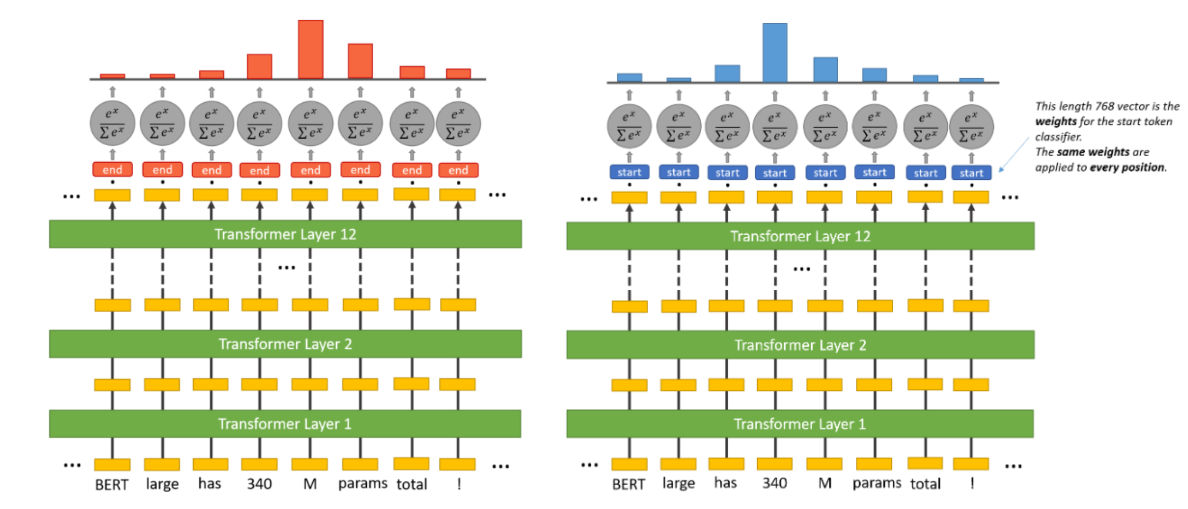

In [4]:
qa_model = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|██████████████████████████████████████████████████████████████████| 261M/261M [00:09<00:00, 28.1MB/s]


In [39]:
question = "What is your name?"
context = "My name is YanXuan and I live in Boston."
qa_model(question = question, context = context)

{'score': 0.9975190758705139, 'start': 11, 'end': 18, 'answer': 'YanXuan'}

In [43]:
question = "Which movie you like best?"
context = "My favorite movie is Indiana Jones and I watched Batman last night ."
qa_model(question = question, context = context)

{'score': 0.9720256924629211,
 'start': 21,
 'end': 34,
 'answer': 'Indiana Jones'}

In [40]:
question = "What's your favorite food?"
context = "I like to eat meat, and my favorite is Peking duck."
qa_model(question = question, context = context)

{'score': 0.9646562933921814, 'start': 39, 'end': 50, 'answer': 'Peking duck'}

It can be seen that because this QA model is relatively basic, there is a problem that it is impossible to find the turning point of the sentence, and it is only suitable for simple logic problems. But the results also model the answers we need pretty well.

3. Summarization (10 Points)
Run a <Summarization> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Summarization is the task of producing a shorter version of a document while preserving its important information.  Summarization is a powerful tool that can speed up various business processes by relieving the burden of domain experts to read long documents in detail. Models can extract text from raw input, while others can generate entirely new text.

Summarization language model uses T5 transformer, which can train joinltly on texts in over 50 languages at once.They focus on mT5, an interesting architecture based on T5 that was pretrained in a text-to-text framework. In T5, every NLP task is formulated in terms of a prompt prefix like summarize: which conditions the model to adapt the generated text to the prompt.

References:
[1] https://huggingface.co/course/chapter7/5?fw=pt
[2] https://huggingface.co/tasks/summarization

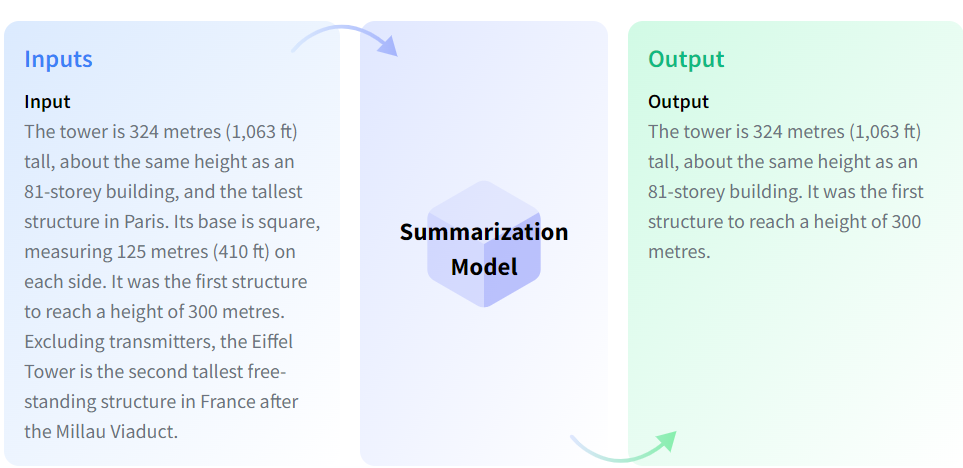

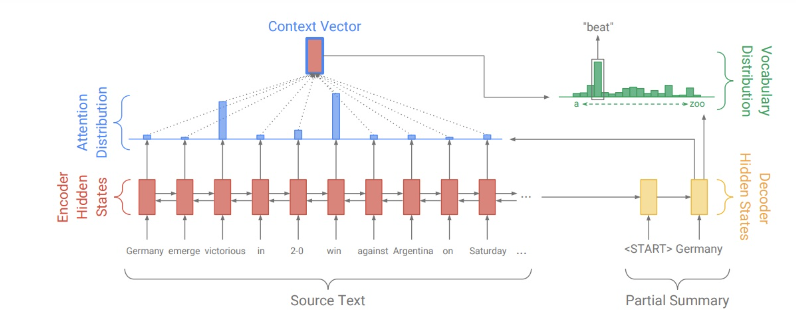

In [7]:
summer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.80k/1.80k [00:00<00:00, 887kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████| 1.22G/1.22G [00:44<00:00, 27.7MB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 26.0/26.0 [00:00<00:00, 13.0kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 899k/899k [00:00<00:00, 5.45MB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 456k/456k [00:00<00:00, 4.07MB/s]


In [9]:
summer("Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018, in an area of more than 105 square kilometres (41 square miles). The City of Paris is the centre and seat of government of the region and province of Île-de-France, or Paris Region, which has an estimated population of 12,174,880, or about 18 percent of the population of France as of 2017.",max_length=56)

[{'summary_text': ' Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018 . City of Paris is centre and seat of government of the region and province of Île-de-France, or Paris Region .'}]

In [20]:
summer("China is a country in East Asia bordering the East China Sea, Korea Bay, and the South China Sea. Neighboring countries include 14 sovereign states. The terrain is diverse in China with mostly mountains along with deserts in the west and plains in the east. Principal rivers flow west to east including the Yangtze and Huang He rivers. The government system is a communist state; the chief of state is the president, and the head of government is the premier. China has a market-based system, changed from a centrally planned system in the 1970s.",max_length=60)

[{'summary_text': ' China is a country in East Asia bordering the East China Sea, Korea Bay, and the South China Sea . The government system is a communist state; the chief of state is the president . China has a market-based system, changed from a centrally planned system in the 1970s .'}]

The original context has been reduced to 'Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018 . City of Paris is centre and seat of government of the region and province of Île-de-France, or Paris Region.' and 'China is a country in East Asia bordering the East China Sea, Korea Bay, and the South China Sea . The government system is a communist state; the chief of state is the president . China has a market-based system, changed from a centrally planned system in the 1970s .'It successfully extracts the summarization of the paragraph.

4. Text Classification (10 Points)
Run a <Text Classification> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Text Classification language model uses AutoNLP to train all the texts. AutoNLP is a tool to train state-of-the-art machine learning models without code. You can train custom models by simply uploading your data. AutoNLP will automatically fine-tune various pre-trained models with your data, take care of the hyperparameter tuning and find the best model for your use case. 

The emotional results of the analyzed data are divided into neutral, positive, and negative emotions, and emotions will be automatically marked to the data by the model as labels. Sentiment analysis can be applied to large-scale data analysis such as comment analysis, which helps us analyze the trend of public opinion.

References:
[1] https://monkeylearn.com/text-classification/
[2] https://huggingface.co/blog/sentiment-analysis-python#3-building-your-own-sentiment-analysis-model

In [10]:
tx_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|████████████████████████████████████████████████████████████████████| 629/629 [00:00<00:00, 89.2kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 268M/268M [00:10<00:00, 26.7MB/s]
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDisti

In [11]:
tx_classifier("A soccer game with multiple males playing. Some men are playing a sport.")

[{'label': 'POSITIVE', 'score': 0.8516817688941956}]

In this example, we can see that the model tends to have positive emotions about playing football.

5. Text Generation (10 Points)
Run a <Text Generation> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Text Generation language model mainly uses GPT-2, which is a transformers model pretrained on a very large corpus of English data in a self-supervised fashion. GPT-2 is an unsupervised deep learning transformer-based language model created by OpenAI back in February 2019 for the single purpose of predicting the next word(s) in a sentence. GPT-2 is an acronym for “Generative Pretrained Transformer 2”.

Text Generation language model was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was trained to guess the next word in sentences.

References:
[1] https://www.kdnuggets.com/2021/02/gpt2-gpt3-openai-showdown.html
[2] https://huggingface.co/tasks/text-generation

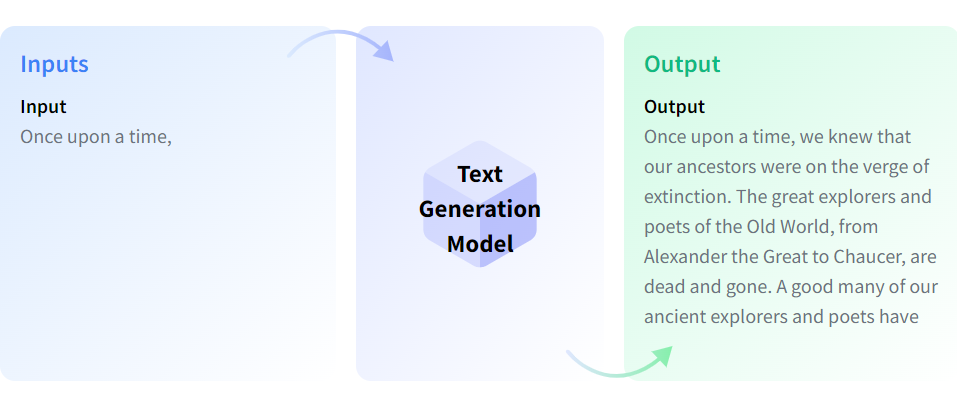

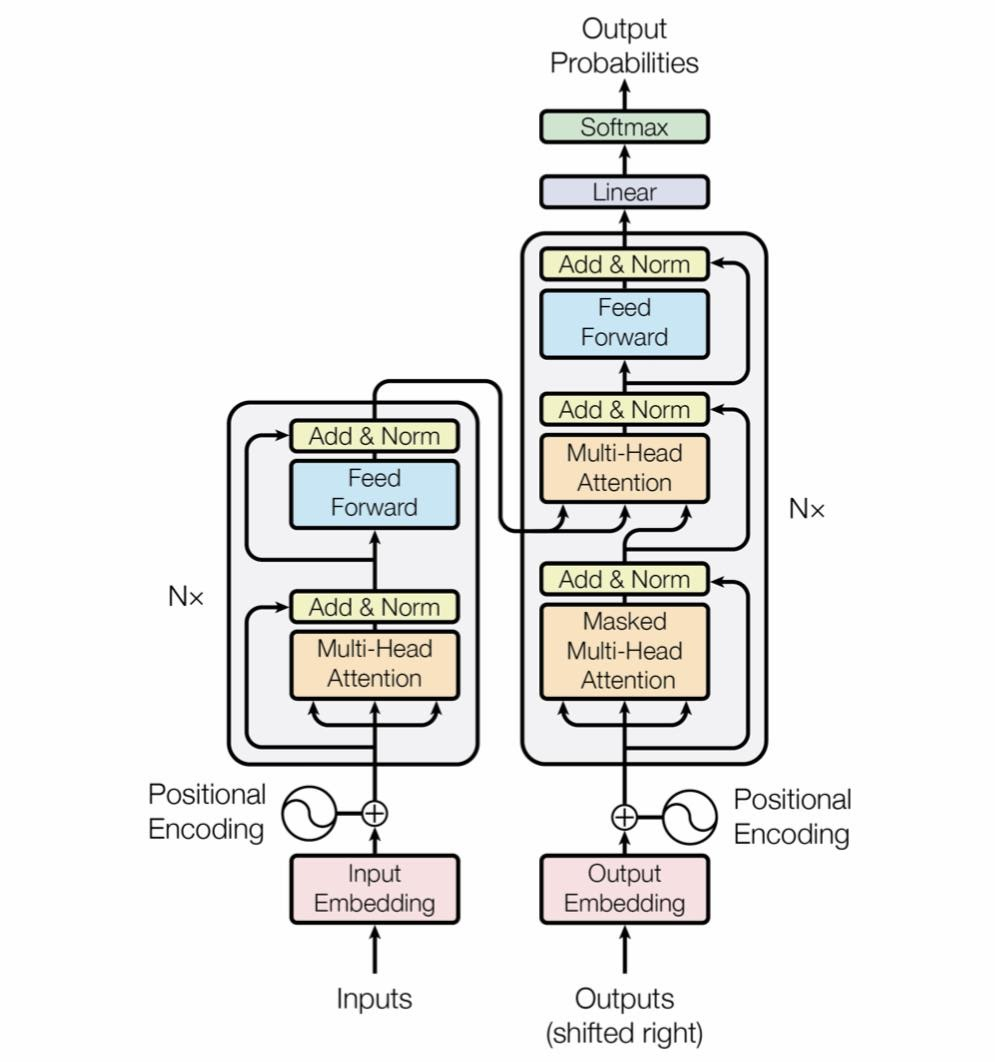

In [24]:
generator = pipeline('text-generation', model = 'gpt2')
generator("Hello, I'm a language model", max_length = 30, num_return_sequences=3)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 548M/548M [00:20<00:00, 26.4MB/s]
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language modeler, but my problem with writing a language model is that most people have an idea about the problems of software,"},
 {'generated_text': "Hello, I'm a language modeler. For me, writing data structures based on the input data in a data structure is the logical path through my"},
 {'generated_text': "Hello, I'm a language modeler. (This isn't what this is about, and it doesn't help)\n\nSo I'm not"}]

In [47]:
generator("Young man can work as a", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Young man can work as a journalist. I've"},
 {'generated_text': 'Young man can work as a computer technician or volunteer'},
 {'generated_text': 'Young man can work as a reporter, but he'},
 {'generated_text': 'Young man can work as a waitress, or walk'},
 {'generated_text': 'Young man can work as a guard for about 18'}]

In [45]:
generator("Wheat is used as", max_length=10, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Wheat is used as a preservative in milk'},
 {'generated_text': 'Wheat is used as a filler ingredient.\n'},
 {'generated_text': 'Wheat is used as an adjunct to make a'},
 {'generated_text': 'Wheat is used as a mildener in wine'},
 {'generated_text': 'Wheat is used as a nonfat and vegetable'}]

It can be seen from the results that we have obtained suitable noun collocations and logical relationships. According to recent experimental results, BERT can also perform well on this task.

6. Text2Text Generation (10 Points)
Run a <Text2Text> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Text-to-Text is a unified framework that converts all NLP tasks into Text-to-Text, that is, text-to-text tasks. There is a separate pipeline for text-to-text generation models called text2text-generation. The pipeline takes an input containing a sentence containing a task and returns an output of the completed task.

References:
[1] https://blog.csdn.net/hecongqing/article/details/103404315

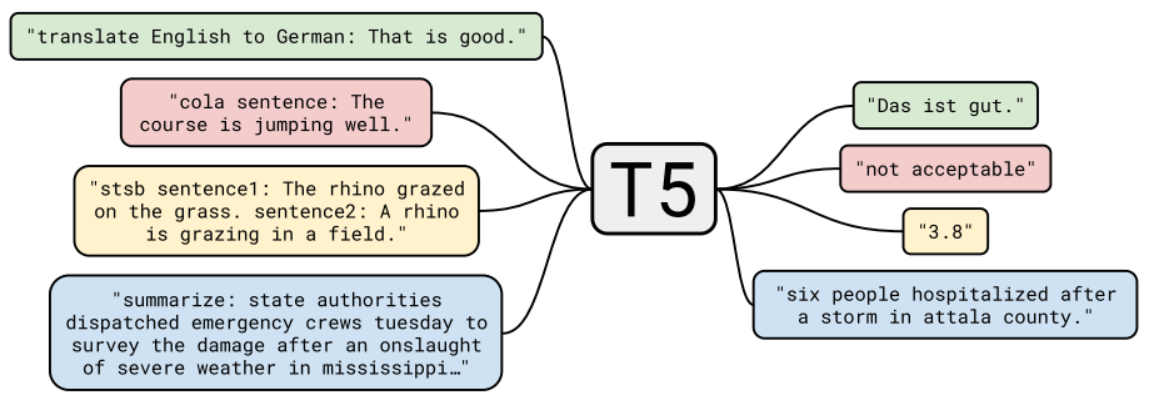

In [10]:
text2text_generator = pipeline("text2text-generation")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|██████████████████████████████████████████████████████████████████| 892M/892M [00:32<00:00, 27.2MB/s]
D:\anaconda3\envs\pytorch\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this toke

In [11]:
text2text_generator("question: What is 42 ? context: 42 is the answer to life, the universe and everything")

[{'generated_text': 'the answer to life, the universe and everything'}]

In [26]:
text2text_generator("question: What is love ? context: Love is an emotion that keeps people bonded and committed to one another.")

[{'generated_text': 'an emotion that keeps people bonded and committed to one another'}]

It can be seen from the results that the model processed redundant text and output more concise and short sentences, which is convenient for further processing and reading.

7. Token Classification (10 Points)
Run a <Token Classification> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Token classification is a natural language understanding task in which a label is assigned to some tokens in a text. Some popular token classification subtasks are Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging. NER models could be trained to identify specific entities in a text, such as dates, individuals and places; and PoS tagging would identify, for example, which words in a text are verbs, nouns, and punctuation marks.

Named Entity Recognition (NER) is the task of recognizing named entities in a text. These entities can be the names of people, locations, or organizations. The task is formulated as labeling each token with a class for each named entity and a class named "0" for tokens that do not contain any entities. The input for this task is text and the output is the annotated text with named entities.
    
Part-of-speech tagging (POS) is to mark each word in a sentence as corresponding to a particular part of speech. Chunkingis to find the tokens that belong to the same entity. This task, which can be combined with POS or NER, can be formulated as attributing one label to any tokens that are at the beginning of a chunk, another labelto tokens that are inside a chunk, and a third label to tokens that don’t belong to any chunk.

References:
[1] https://huggingface.co/tasks/token-classification
[2] https://huggingface.co/docs/transformers/tasks/token_classification

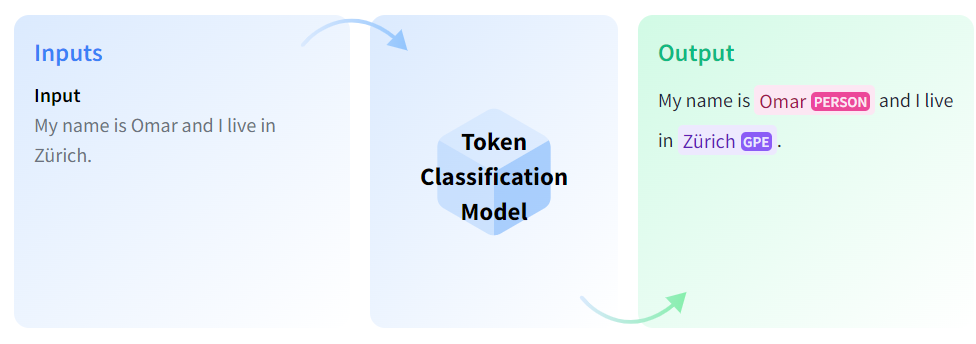

In [28]:
tk_classifier = pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|████████████████████████████████████████████████████████████████| 1.33G/1.33G [00:49<00:00, 26.9MB/s]


In [33]:
tk_classifier("I am currently pursuing a master's degree at Northeastern University.")

[{'entity': 'I-ORG',
  'score': 0.9979658,
  'index': 11,
  'word': 'Northeastern',
  'start': 45,
  'end': 57},
 {'entity': 'I-ORG',
  'score': 0.9958484,
  'index': 12,
  'word': 'University',
  'start': 58,
  'end': 68}]

According to the results of the model simulation, we get the keywords and positions in the sentence. Token classification can find key words in sentences, so it is usful in QA questions.

8. Translation (10 Points)
Run a <Translation> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

In Translation Language Model,we take a sequence of parallel sentences from the translation data and randomly mask tokens from the source as well as from the target sentence. This is a sequence-to-sequence task,  which means it’s a problem that can be formulated as going from one sequence to another, so in a sense it's close to the Summarization language model.

References:
[1] https://towardsdatascience.com/xlm-enhancing-bert-for-cross-lingual-language-model-5aeed9e6f14b

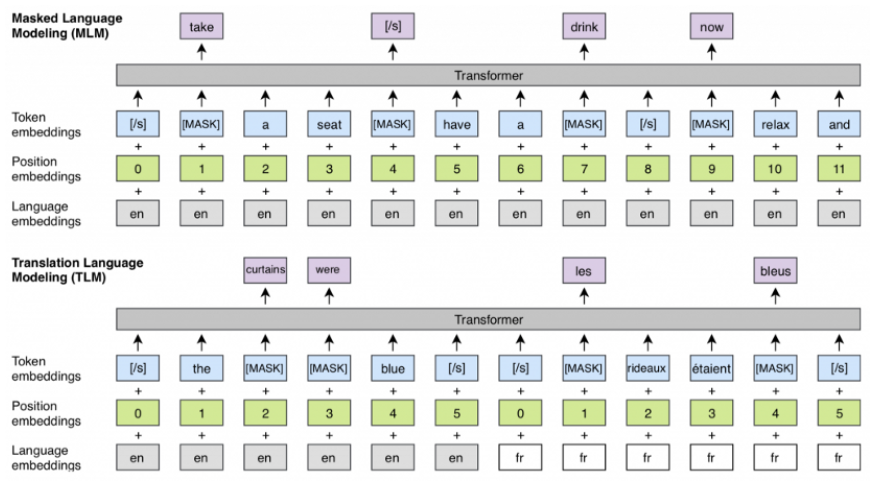

In [12]:
en_fr_translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
en_fr_translator("How old are you?")

[{'translation_text': ' quel âge êtes-vous?'}]

In [34]:
en_fr_translator("Have a good day!")

[{'translation_text': 'Bonne journée!'}]

We can see that English is successfully translated into French. This model uses the kde4 dataset containing 92 languages, but we cannot change the built-in language through the interface at will, we need to modify the source code.

9. Zero-Shot Classification (10 Points)
Run a <Zero-Shot> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

The picture below shows the anatomy of a typical embedding based zero-shot method. The input image is first passed through a feature extractor network (typically a deep neural network) to get an N dimensional feature vector for the image. This feature vector acts as the input to our main projection network which in turn outputs a D dimensional output vector. The goal is to learn the weights/parameters of the projection network such that it maps the N dimensional input from visual space to a D dimensional output in the semantic space. To achieve this, we impose a loss which measures the compatibility between the D dim output and ground truth semantic attribute. The weights of the network are trained such that the D dim output is as close as possible to the ground truth attribute.
    
Zero-Shot Learning referred to a specific type of task, which is to  learn a classifier on one set of labels and then evaluate on a different set of labels that the classifier has never seen before. At test time, a learner observes samples from classes which were not observed during training, and needs to predict the class that they belong to.

References:
[1] https://learnopencv.com/zero-shot-learning-an-introduction/

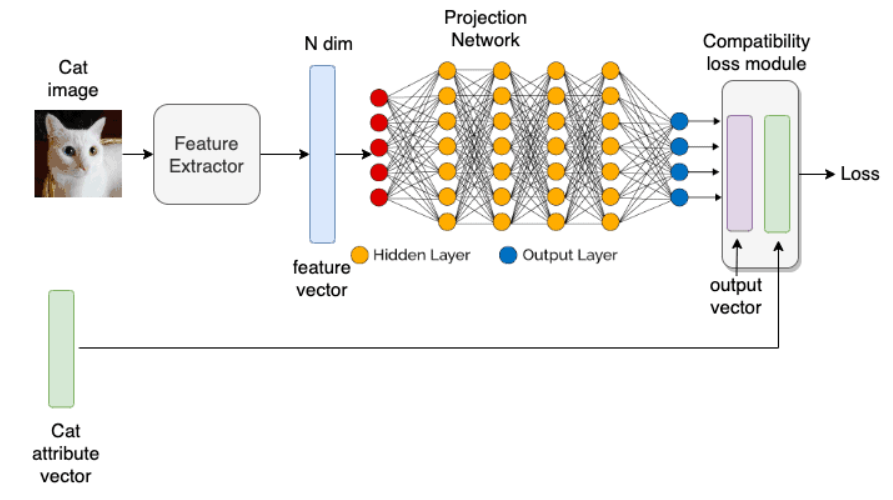

In [2]:
classifier_0 = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
sequence = "What kind of food do you like to eat?"
candidate_labels = ["science-fiction", "action", "romantic"]

classifier_0(sequence, candidate_labels)

{'sequence': 'What kind of food do you like to eat?',
 'labels': ['action', 'romantic', 'science-fiction'],
 'scores': [0.731688916683197, 0.1524752974510193, 0.11583580076694489]}

In [5]:
sequence = "How do you like to relax yourself on weekends?"
candidate_labels = ["science-fiction", "action", "romantic"]

classifier_0(sequence, candidate_labels)

{'sequence': 'How do you like to relax yourself on weekends?',
 'labels': ['action', 'romantic', 'science-fiction'],
 'scores': [0.7306776642799377, 0.17180295288562775, 0.09751933068037033]}

From the results of the model simulation, it can be seen that the model obtained classification according to the labels. We can differentiate the accuracy based on the score.

10. Sentence Similarity (10 Points)
Run a <Sentence Similarity> language model. Explain the theory behind your model, and run it.  Analyze how well you think it worked.

Sentence Similarity is the task of determining how similar two texts are. Sentence similarity models convert input texts into vectors (embeddings) that capture semantic information and calculate how close (similar) they are between them. This task is particularly useful for information retrieval and clustering/grouping.
    
Sentence similarity is normally calculated by the following two steps. Firstly, obtaining the embeddings of the sentences. Next step is taking the cosine similarity between them.The common methods used for text similarity range from simple word-vector dot products to pairwise classification, and more recently, deep neural networks.

References:
[1] https://huggingface.co/tasks/sentence-similarity
[2] https://stackoverflow.com/questions/65199011/is-there-a-way-to-check-similarity-between-two-full-sentences-in-python

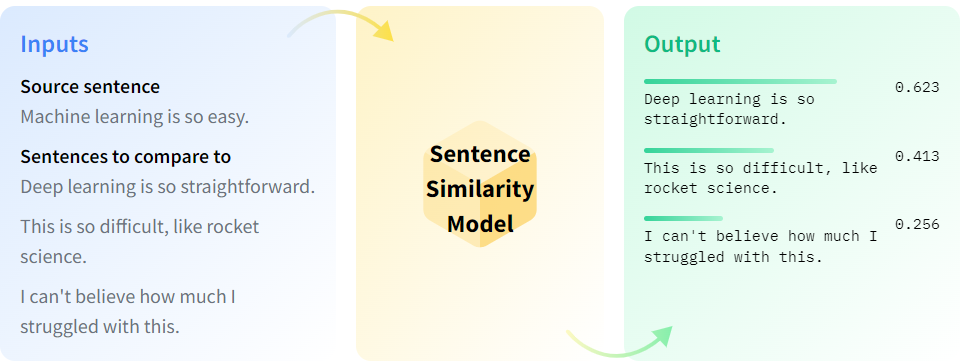

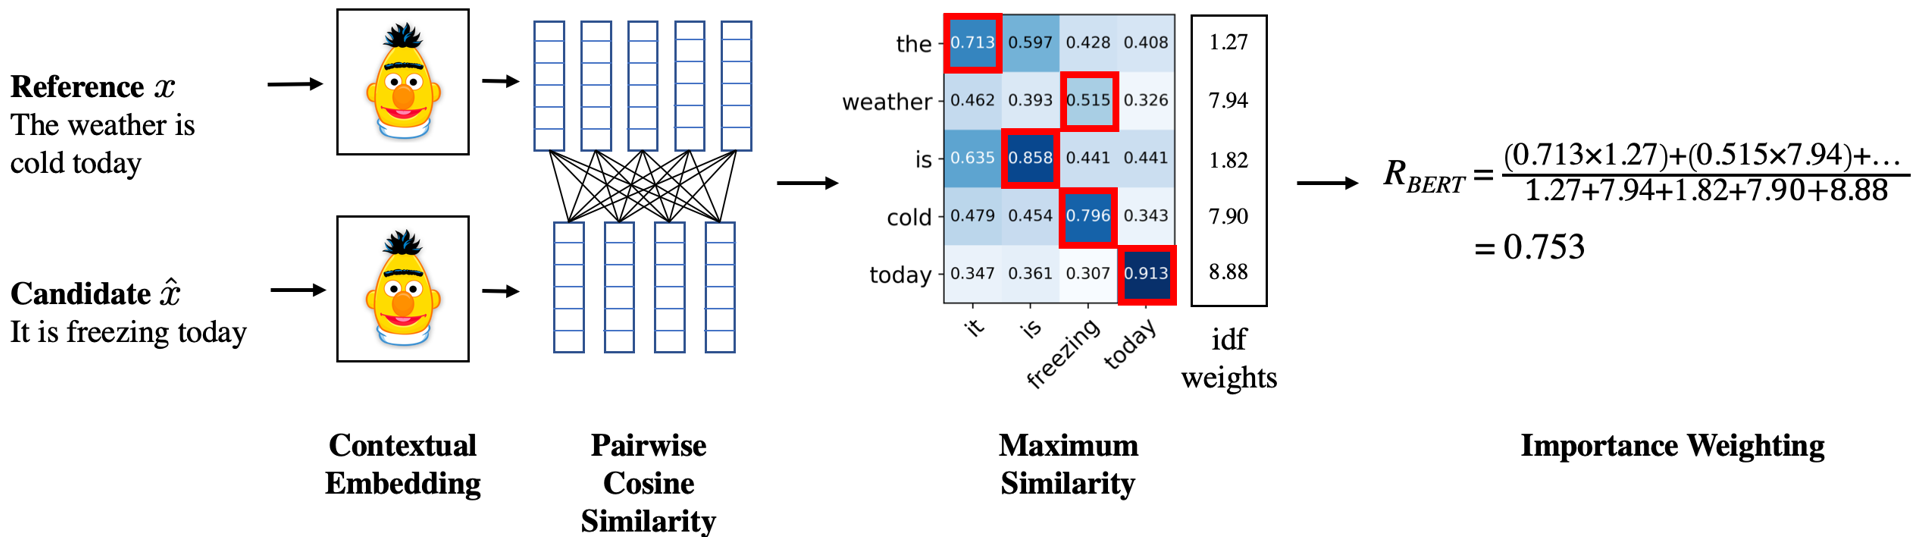

In [1]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
print(embeddings)

D:\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.18k/1.18k [00:00<00:00, 588kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 64.3kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████| 10.6k/10.6k [00:00<00:00, 5.29MB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████████| 116/116 [00:00<00:00, 58.1kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████| 39.3k/39.3k [00:00<00:00, 1.77MB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 438M/438M [00:15<00:00, 27.9MB/s]
Downloading: 100%|█████████████

[[ 0.02250257 -0.07829178 -0.02303074 ... -0.00827928  0.02652692
  -0.00201897]
 [ 0.04170237  0.00109738 -0.01553418 ... -0.02181629 -0.06359358
  -0.00875285]]


According to the simulation results, we can see that the similarity between the two sentences is not high according to the scores.